# BASE MODEL

After the exploratory data analysis part is over, there is a part of deciding which model or models to choose in the modeling part.

For this, it was desired to understand the success of the models quickly by creating a base model function and to make a model decision accordingly.

In [2]:
import joblib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

!pip install catboost
!pip install lightgbm
!pip install xgboost

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [3]:
data=pd.read_csv("customer_data.csv")

In [4]:
data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Transaction_Count_per_Contact,Loyal_Customer,Creditworthiness,Cr_Util_Rate,Attrition_Flag
0,0.0,-1.0,0.5,-1.0,1.0,0.5,0.0,0.0,0.5,-1.0,1.0,0.956476,-0.350175,0.988927,2.627193,-1.065558,-0.694444,3.911017,-0.239583,-0.500000,0.0,-0.284692,-0.238398,0
1,0.0,0.0,1.5,0.0,0.0,-0.5,0.0,0.0,1.0,-1.0,0.0,0.435477,-0.289123,0.459078,3.530702,-1.008702,-0.944444,12.762712,-0.147917,-0.666667,0.0,-0.618989,-0.147921,0
2,0.0,-1.0,0.5,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,-2.0,-0.132863,-0.895439,-0.006562,8.149123,-0.778186,-1.305556,6.911017,-0.366667,-0.907407,0.0,2.281101,-0.365955,0
3,-1.0,0.0,1.0,-1.0,0.0,-0.5,0.0,-1.0,-0.5,2.0,-1.0,-0.145198,0.870877,-0.313785,2.934211,-1.055115,-1.305556,6.911017,1.216667,-0.537037,-1.0,-0.228374,1.216900,0
4,-1.0,-1.0,0.5,-1.0,1.0,0.5,0.0,-2.0,0.5,-1.0,-2.0,0.019618,-0.895439,0.145527,6.311404,-1.192419,-1.083333,7.618644,-0.366667,-1.277778,-1.0,0.723351,-0.365955,0


In [35]:
y = data["Attrition_Flag"]
X = data.drop(["Attrition_Flag"], axis=1)

In [36]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier()),
                   ('LightGBM', LGBMClassifier()),
                   ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [37]:
base_models(X, y, scoring="accuracy")

Base Models....
accuracy: 0.7882 (LR) 
accuracy: 0.8234 (SVC) 
accuracy: 0.8304 (CART) 
accuracy: 0.8557 (RF) 
accuracy: 0.8594 (Adaboost) 
accuracy: 0.8839 (GBM) 
accuracy: 0.8857 (XGBoost) 
accuracy: 0.8875 (LightGBM) 
accuracy: 0.8921 (CatBoost) 


In [38]:
base_models(X, y, scoring="f1")

Base Models....
f1: 0.5175 (LR) 
f1: 0.5416 (SVC) 
f1: 0.5668 (CART) 
f1: 0.6272 (RF) 
f1: 0.6368 (Adaboost) 
f1: 0.6724 (GBM) 
f1: 0.6822 (XGBoost) 
f1: 0.6773 (LightGBM) 
f1: 0.6927 (CatBoost) 


In [39]:
base_models(X, y, scoring="roc_auc")

Base Models....
roc_auc: 0.8944 (LR) 
roc_auc: 0.8709 (SVC) 
roc_auc: 0.7437 (CART) 
roc_auc: 0.8748 (RF) 
roc_auc: 0.8816 (Adaboost) 
roc_auc: 0.889 (GBM) 
roc_auc: 0.8955 (XGBoost) 
roc_auc: 0.9051 (LightGBM) 
roc_auc: 0.8992 (CatBoost) 


Accuracy is the ratio of correct predictions to all predictions in the system. 

As seen by base_models(X, y, scoring="accuracy"), the accuracy of the models is quite <span style="color:red">high</span>. When looking at base_models(X, y, scoring="f1") the values are quite <span style="color:red">low</span>. 

The F1 score is defined as the harmonic mean of precision and recall. 


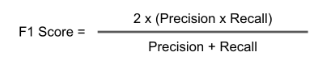

Interpreting the results of the metrics is very important at this point. 


**At this point, we can say that the distribution of the data is not balanced and therefore the accuracy is high while the f1 score is low. Let's do this again by looking at the percentages of categories 1 and 0 of our dependent variable.**




In [74]:
data["Attrition_Flag"].value_counts()*100/len(data["Attrition_Flag"])

0    83.934038
1    16.065962
Name: Attrition_Flag, dtype: float64

The SMOTE method was applied to the dataset to remove the imbalance.

### SMOTE Oversampling:

Generating minority class synthetic samples to prevent overfitting.

1. First, a random sample from the minority class is selected.
2. Then, k nearest neighbors are found for this sample.
3. One of the k nearest neighbors is randomly selected and the synthetic sample is formed by combining it with the randomly selected sample from the minority class and forming a line segment in the feature space.


NOTE: <span style="color:red">The methods should be applied to the train set. Correct evaluation cannot be made if it is applied to the test set.</span> 

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [31]:
sm = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [32]:
base_models(X_train, y_train, scoring="accuracy")

Base Models....
accuracy: 0.8607 (LR) 
accuracy: 0.9421 (SVC) 
accuracy: 0.9452 (CART) 
accuracy: 0.9752 (RF) 
accuracy: 0.9477 (Adaboost) 
accuracy: 0.9612 (GBM) 
accuracy: 0.9657 (XGBoost) 
accuracy: 0.9675 (LightGBM) 
accuracy: 0.9602 (CatBoost) 


In [33]:
base_models(X_train, y_train, scoring="f1")

Base Models....
f1: 0.8614 (LR) 
f1: 0.9432 (SVC) 
f1: 0.9449 (CART) 
f1: 0.975 (RF) 
f1: 0.947 (Adaboost) 
f1: 0.9601 (GBM) 
f1: 0.9638 (XGBoost) 
f1: 0.9661 (LightGBM) 
f1: 0.9569 (CatBoost) 


In [34]:
base_models(X_train, y_train, scoring="roc_auc")

Base Models....
roc_auc: 0.9362 (LR) 
roc_auc: 0.9827 (SVC) 
roc_auc: 0.9456 (CART) 
roc_auc: 0.997 (RF) 
roc_auc: 0.9899 (Adaboost) 
roc_auc: 0.9951 (GBM) 
roc_auc: 0.9976 (XGBoost) 
roc_auc: 0.9979 (LightGBM) 
roc_auc: 0.998 (CatBoost) 


In [72]:
from sklearn.metrics import classification_report
def base_models_test(X_train, y_train,x_test,y_test):
    print("Base Models....")
    classifiers = [#('LR', LogisticRegression().fit(X_train,y_train)),
                   #("SVC", SVC().fit(X_train,y_train)),
                   ("CART", DecisionTreeClassifier().fit(X_train,y_train)),
                   ("RF", RandomForestClassifier().fit(X_train,y_train)),
                   ('Adaboost', AdaBoostClassifier().fit(X_train,y_train)),
                   ('GBM', GradientBoostingClassifier().fit(X_train,y_train)),
                   ('XGBoost', XGBClassifier().fit(X_train,y_train)),
                   ('LightGBM', LGBMClassifier().fit(X_train,y_train)),
                   ('CatBoost', CatBoostClassifier(verbose=False).fit(X_train,y_train))
                   ]

    for name, classifier in classifiers:
        print(name)
        y_pred = classifier.predict(X_test)
        print(classification_report(y_test, y_pred))

In [73]:
base_models_test(X_train, y_train,X_test,y_test)

Base Models....
CART
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1695
           1       0.74      0.82      0.78       331

    accuracy                           0.92      2026
   macro avg       0.85      0.88      0.87      2026
weighted avg       0.93      0.92      0.93      2026

RF
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1695
           1       0.89      0.87      0.88       331

    accuracy                           0.96      2026
   macro avg       0.93      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Adaboost
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1695
           1       0.79      0.92      0.85       331

    accuracy                           0.95      2026
   macro avg       0.88      0.93      0.91      2026
weighted avg       0.95      0.95      0.

For hyperparameter optimization, instead of making it to all models, the model that is successful in this data will be selected and the hyperparameter will be continued over it.

In this section, it is aimed to quickly look at all models in order to decide on the model selection.